<a href="https://colab.research.google.com/github/zrosen3/Colombian-peso-counterfeit-detection/blob/main/Code/res_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 42350, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 42350 (delta 115), reused 55 (delta 35), pack-reused 42174
Receiving objects: 100% (42350/42350), 886.13 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (1274/1274), done.
Updating files: 100% (103997/103997), done.
/content/Colombian-peso-counterfeit-detection/Code


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


#Load in data

In [3]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


## Run Resnet model

In [4]:
#Reshape data
output_shape = (224, 224)
def reshape_batch(images, labels):
    resized_images = tf.image.resize(images, output_shape)  # Resize the images
    return (resized_images, labels)
train_ds = train_ds.map(reshape_batch)
test_ds = test_ds.map(reshape_batch)
validation_ds = validation_ds.map(reshape_batch)
print(train_ds)
print(test_ds)
print(validation_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
#Run ResNet model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(resnet_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=13, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data = validation_ds, epochs=5)

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/5
2080/2080 [==============================] - 149s 49ms/step - loss: 0.3107 - accuracy: 0.8984 - val_loss: 1.4680 - val_accuracy: 0.6207
Epoch 2/5
2080/2080 [==============================] - 99s 48ms/step - loss: 0.1023 - accuracy: 0.9641 - val_loss: 0.1061 - val_accuracy: 0.9644
Epoch 3/5
2080/2080 [==============================] - 99s 48ms/step - loss: 0.0868 - accuracy: 0.9698 - val_loss: 0.1646 - val_accuracy: 0.9463
Epoch 4/5
2080/2080 [==============================] - 100s 48ms/step - loss: 0.0734 - accuracy: 0.9737 - val_loss: 0.0826 - val_accuracy: 0.9690
Epoch 5/5
2080/2080 [==============================] - 99s 48ms/step - loss: 0.0603 - accuracy: 0.9792 - val_loss: 0.1143 - val_accuracy: 0.9593


## Inspect model performance

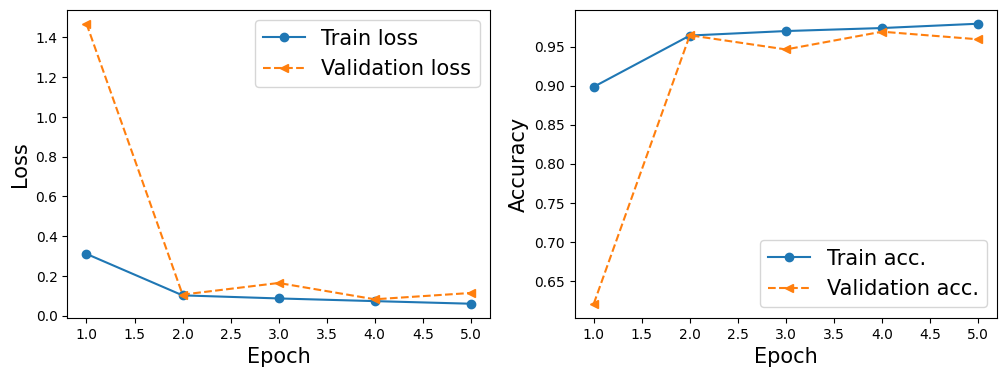

694/694 - 8s - loss: 0.1194 - accuracy: 0.9588 - 8s/epoch - 11ms/step
Test loss: 0.1194261983036995 | Test accuracy: 0.9587740302085876


(0.9792050719261169, 0.959254801273346, 0.9587740302085876)

In [6]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 0.9587740384615385
Macro averaged recall score: 0.9609960290880579
Macro averaged F1 score: 0.9591333477736822


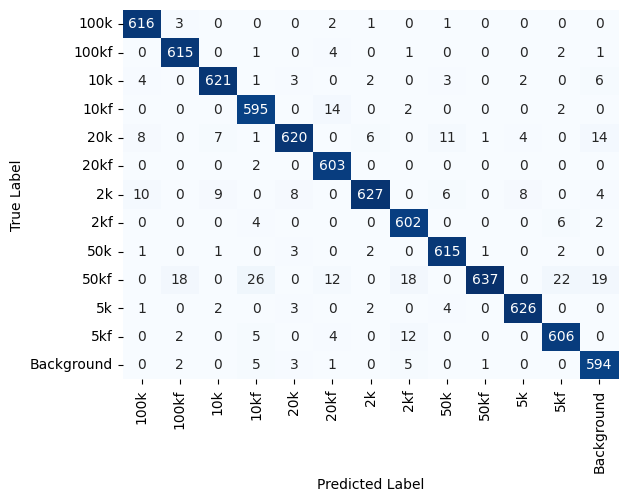

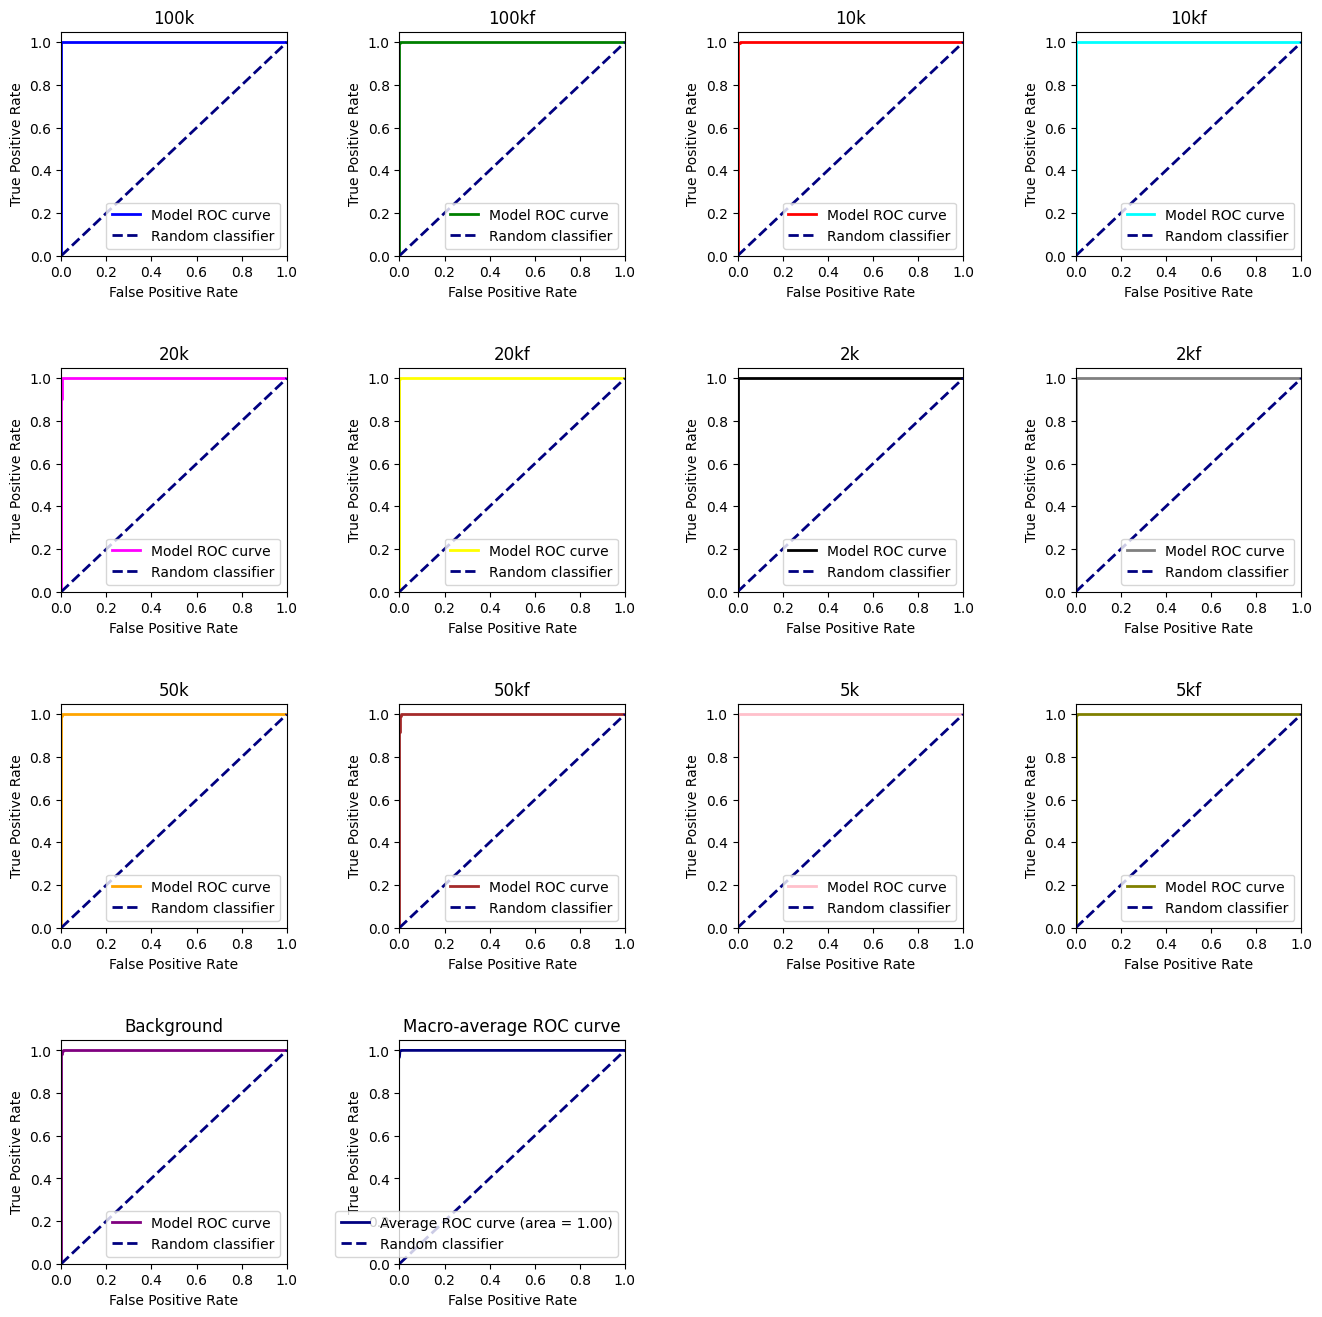

In [7]:
cf.precision_recall_metrics(model, test_ds, class_names)